In [16]:
# Cell 1: Process datasets (Updated with two stages)

import os
from collections import Counter
import pickle
from pathlib import Path
import re
import string

# Define the root directory where datasets are located
root_dir = './data'
output_dir = './processed'
os.makedirs(output_dir, exist_ok=True)

def read_file_content(file_path):
    """Read file content as UTF-8, ignoring errors."""
    try:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
            return f.read()
    except Exception as e:
        print(f"  ERROR reading {file_path}: {e}")
        return ""

def extract_meaningful_words(content):
    """Extract meaningful words/identifiers, exclude pure syntax symbols"""
    tokens = content.split()
    meaningful_words = []

    for token in tokens:
        stripped = token.strip(string.punctuation)
        if not stripped:
            continue
        if any(c.isalpha() for c in stripped):
            meaningful_words.append(stripped)
        elif stripped.isdigit():
            meaningful_words.append(stripped)
        elif any(c.isalnum() for c in stripped) and len(stripped) <= 10:
            meaningful_words.append(stripped)
    return meaningful_words

def count_shift_presses(content):
    """Count how many times shift key would be pressed (for uppercase letters)"""
    return sum(1 for c in content if c.isupper())

def process_dataset_stage1(dataset_path, dataset_name):
    """Stage 1: Raw character and word counts without lowering"""
    print(f"\n[STAGE 1] Processing dataset: {dataset_name}")
    char_counter = Counter()
    word_counter = Counter()
    file_count = 0
    total_chars = 0
    shift_presses = 0
    processed_files = []

    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            file_path = os.path.join(root, file)
            relative_path = os.path.relpath(file_path, dataset_path)

            content = read_file_content(file_path)
            if content:
                char_counter.update(content)
                words = extract_meaningful_words(content)
                word_counter.update(words)

                shift_presses += count_shift_presses(content)

                file_count += 1
                total_chars += len(content)
                processed_files.append({
                    'path': relative_path,
                    'chars': len(content),
                    'words': len(words)
                })

                if file_count % 100 == 0:
                    print(f"    Progress: {file_count} files processed")

    return {
        'char_counts': dict(char_counter.most_common()),
        'word_counts': dict(word_counter.most_common()),
        'shift_presses': shift_presses,
        'stats': {
            'file_count': file_count,
            'total_characters': total_chars,
            'unique_characters': len(char_counter),
            'unique_words': len(word_counter)
        },
        'processed_files': processed_files
    }

def process_dataset_stage2(stage1_data):
    """Stage 2: Lowercase words, simulate shift key presses, filter words"""
    print("\n[STAGE 2] Lowercasing and refining...")

    # Lowercase all words
    word_counts_lower = Counter()
    for word, count in stage1_data['word_counts'].items():
        word_counts_lower[word.lower()] += count

    # Recompute char counts with lowercased content
    char_counts_lower = Counter()
    for char, count in stage1_data['char_counts'].items():
        char_lower = char.lower()
        char_counts_lower[char_lower] += count

    # Additional filtering (optional)
    filtered_words = {
        word: count for word, count in word_counts_lower.items()
        if len(word) > 1 or word.isdigit()  # exclude single-letter words unless numeric
    }

    return {
        'char_counts': dict(char_counts_lower.most_common()),
        'word_counts': dict(word_counts_lower.most_common()),
        'filtered_word_counts': dict(filtered_words),
        'shift_presses': stage1_data['shift_presses'],
        'stats': stage1_data['stats']
    }

# Main processing
print("Starting dataset processing (Stage 1)...")
results = {}

if not os.path.exists(root_dir):
    print(f"ERROR: Root directory does not exist: {root_dir}")
else:
    datasets = [item for item in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, item))]
    print(f"Found {len(datasets)} datasets: {datasets}")

    for dataset_name in datasets:
        dataset_path = os.path.join(root_dir, dataset_name)
        stage1_result = process_dataset_stage1(dataset_path, dataset_name)
        stage2_result = process_dataset_stage2(stage1_result)
        results[dataset_name] = {
            'stage1': stage1_result,
            'stage2': stage2_result
        }

# Save results
output_file = os.path.join(output_dir, 'dataset_stats_staged.pkl')
with open(output_file, 'wb') as f:
    pickle.dump(results, f)

print(f"\n{'='*50}")
print(f"Processing complete. Results saved to {output_file}")
print(f"{'='*50}")

# Print final summary
print("\n=== FINAL SUMMARY ===")
for dataset_name, data in results.items():
    stats = data['stage2']['stats']
    print(f"\n{dataset_name}:")
    print(f"  Files: {stats['file_count']:,}")
    print(f"  Characters: {stats['total_characters']:,}")
    print(f"  Unique chars: {stats['unique_characters']:,}")
    print(f"  Unique words: {stats['unique_words']:,}")
    print(f"  Shift Presses: {data['stage2']['shift_presses']:,}")

print(f"\nTotal datasets processed: {len(results)}")

Starting dataset processing (Stage 1)...
Found 3 datasets: ['the_algorithms_code', 'gutenberg', 'cartigratis']

[STAGE 1] Processing dataset: the_algorithms_code
    Progress: 100 files processed
    Progress: 200 files processed
    Progress: 300 files processed
    Progress: 400 files processed
    Progress: 500 files processed
    Progress: 600 files processed
    Progress: 700 files processed
    Progress: 800 files processed
    Progress: 900 files processed
    Progress: 1000 files processed
    Progress: 1100 files processed
    Progress: 1200 files processed
    Progress: 1300 files processed
    Progress: 1400 files processed
    Progress: 1500 files processed
    Progress: 1600 files processed
    Progress: 1700 files processed
    Progress: 1800 files processed
    Progress: 1900 files processed
    Progress: 2000 files processed
    Progress: 2100 files processed
    Progress: 2200 files processed
    Progress: 2300 files processed
    Progress: 2400 files processed
    Pro


CHARACTER & WORD FREQUENCY ANALYSIS
✅ Successfully loaded data from ./processed/dataset_stats_staged.pkl
Data keys: ['the_algorithms_code', 'gutenberg', 'cartigratis']
First dataset structure: ['stage1', 'stage2']
Stage1 keys: ['char_counts', 'word_counts', 'shift_presses', 'stats', 'processed_files']
Stage2 keys: ['char_counts', 'word_counts', 'filtered_word_counts', 'shift_presses', 'stats']

🔤 TOP 30 CHARACTERS PER DATASET
the_algorithms_code Char  the_algorithms_code Count gutenberg Char  gutenberg Count cartigratis Char  cartigratis Count
                   SPACE                    4056403          SPACE         12257080            SPACE            6769014
                       e                    1137401              e          7267012                e            3904806
                       t                     946049              t          5179847                i            3798520
                       r                     712680              a          4646646      

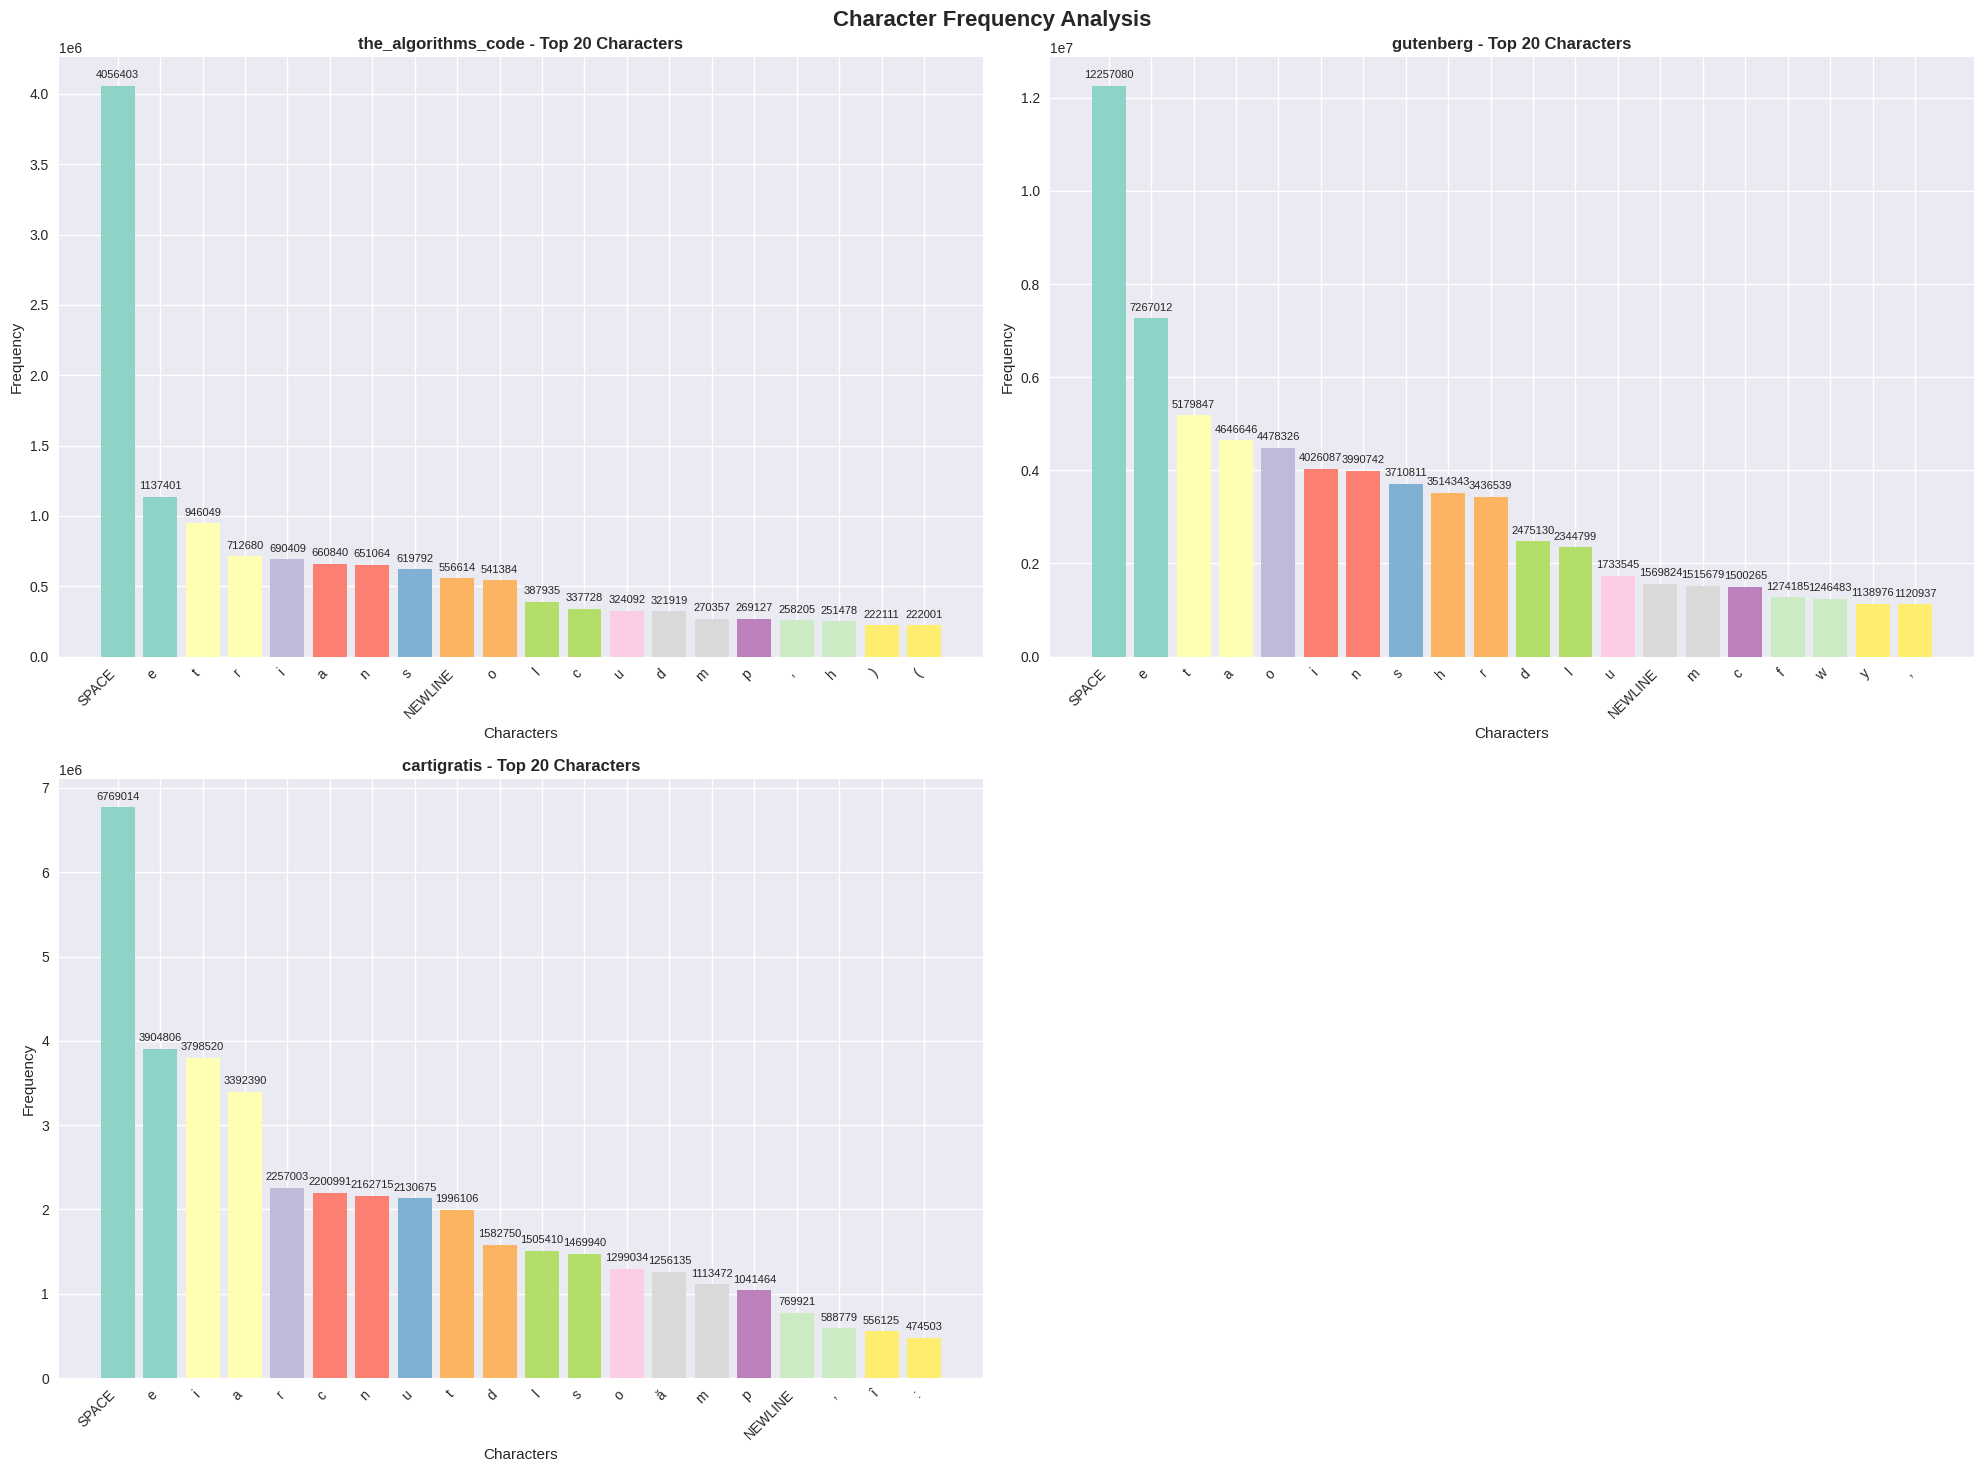



📈 WORD FREQUENCY VISUALIZATION


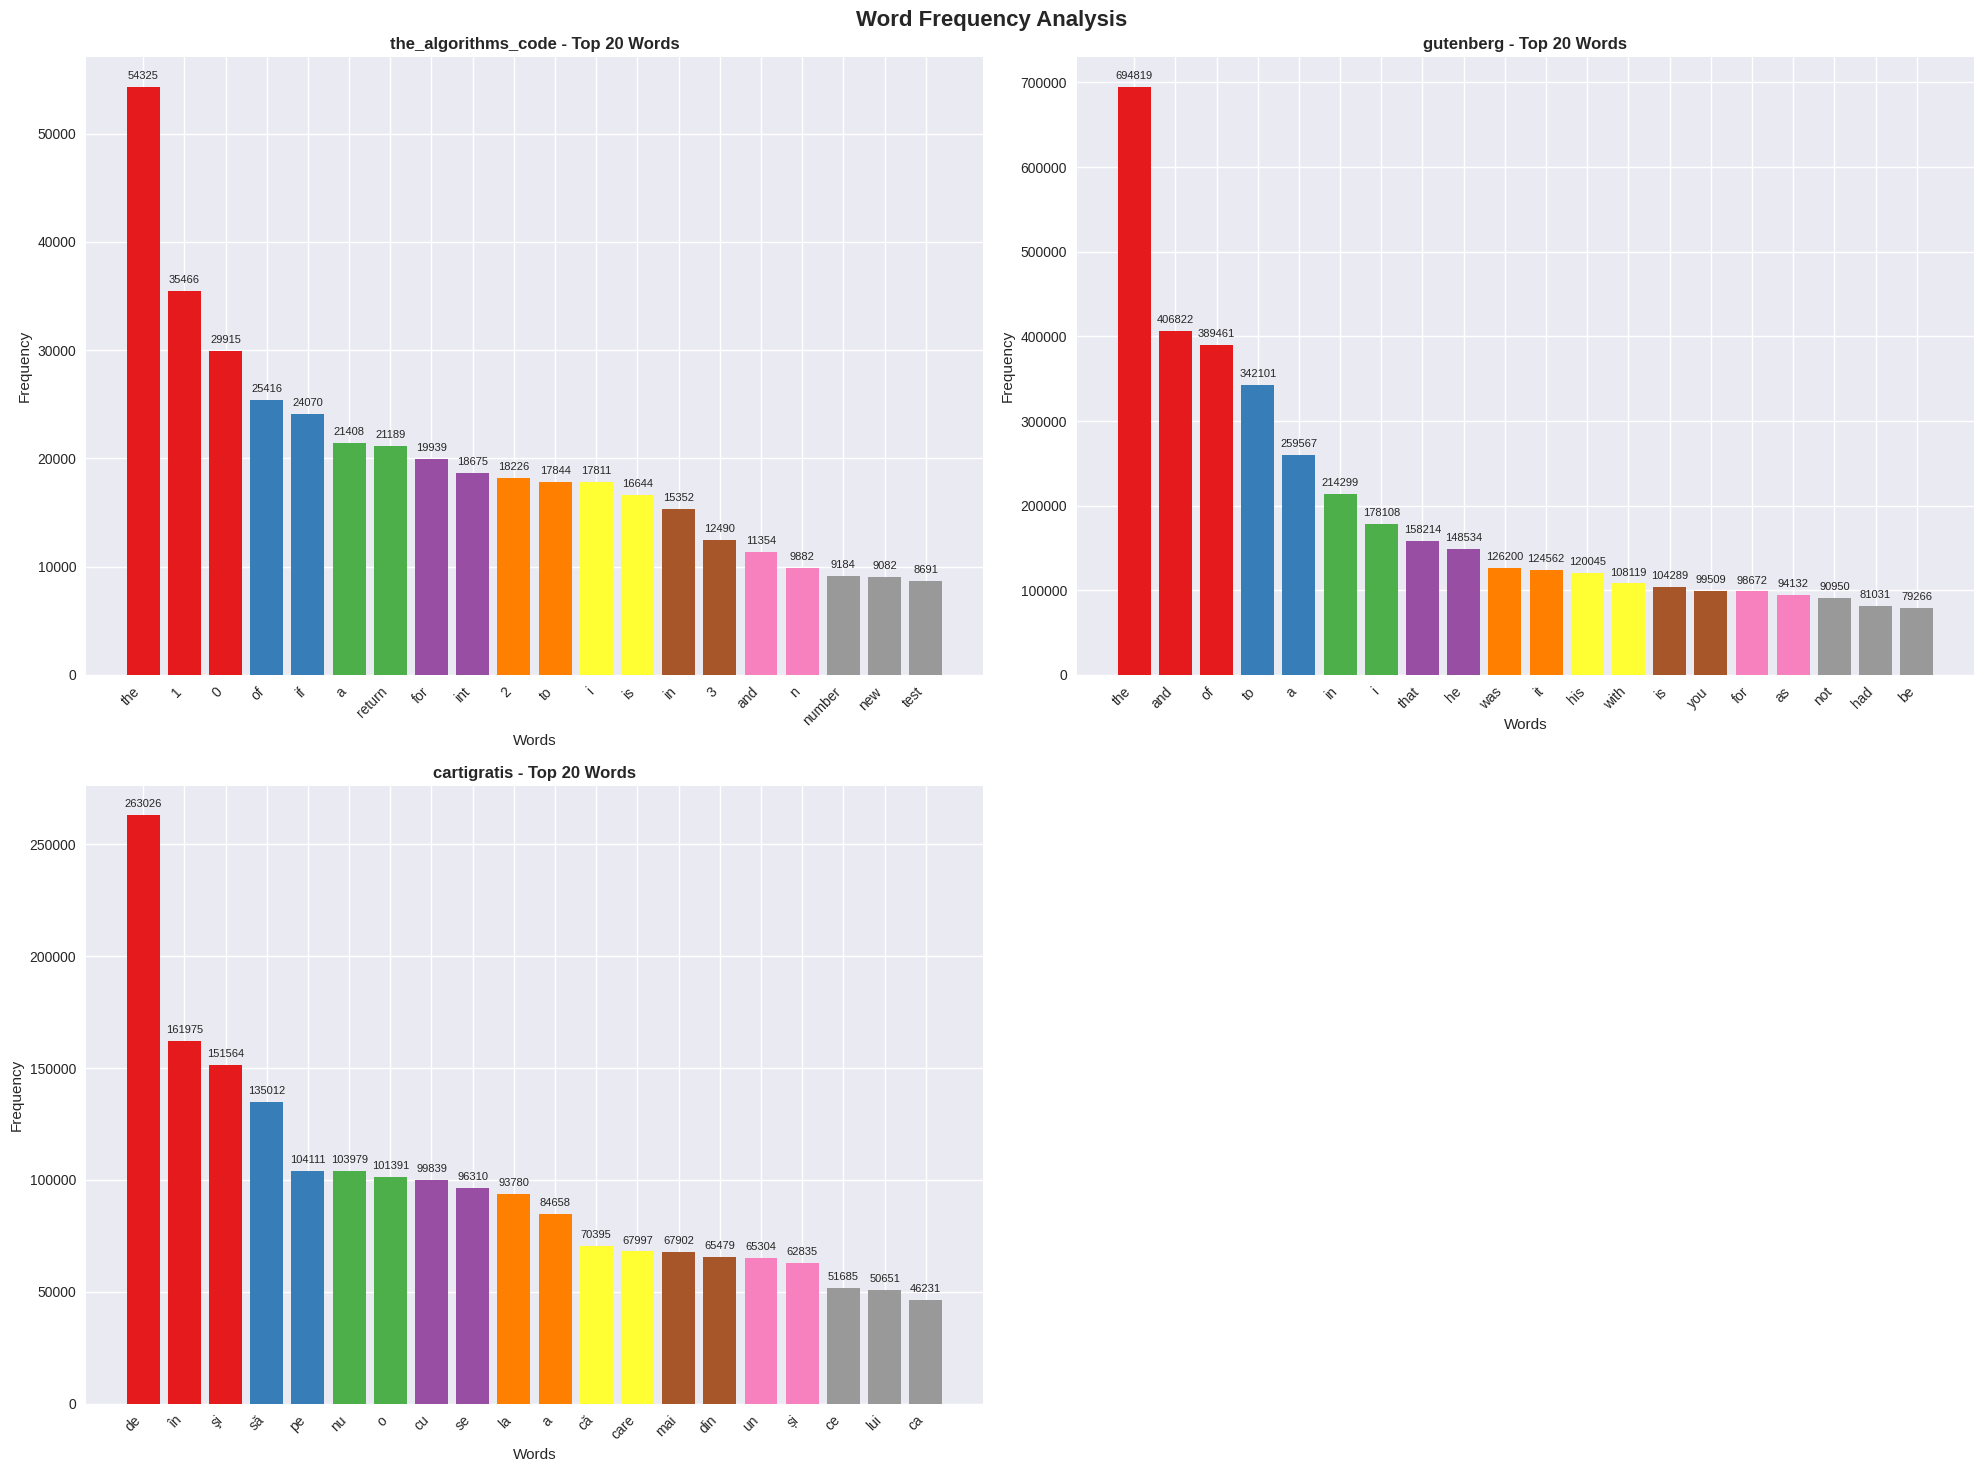



📊 DATASET COMPARISON CHARTS


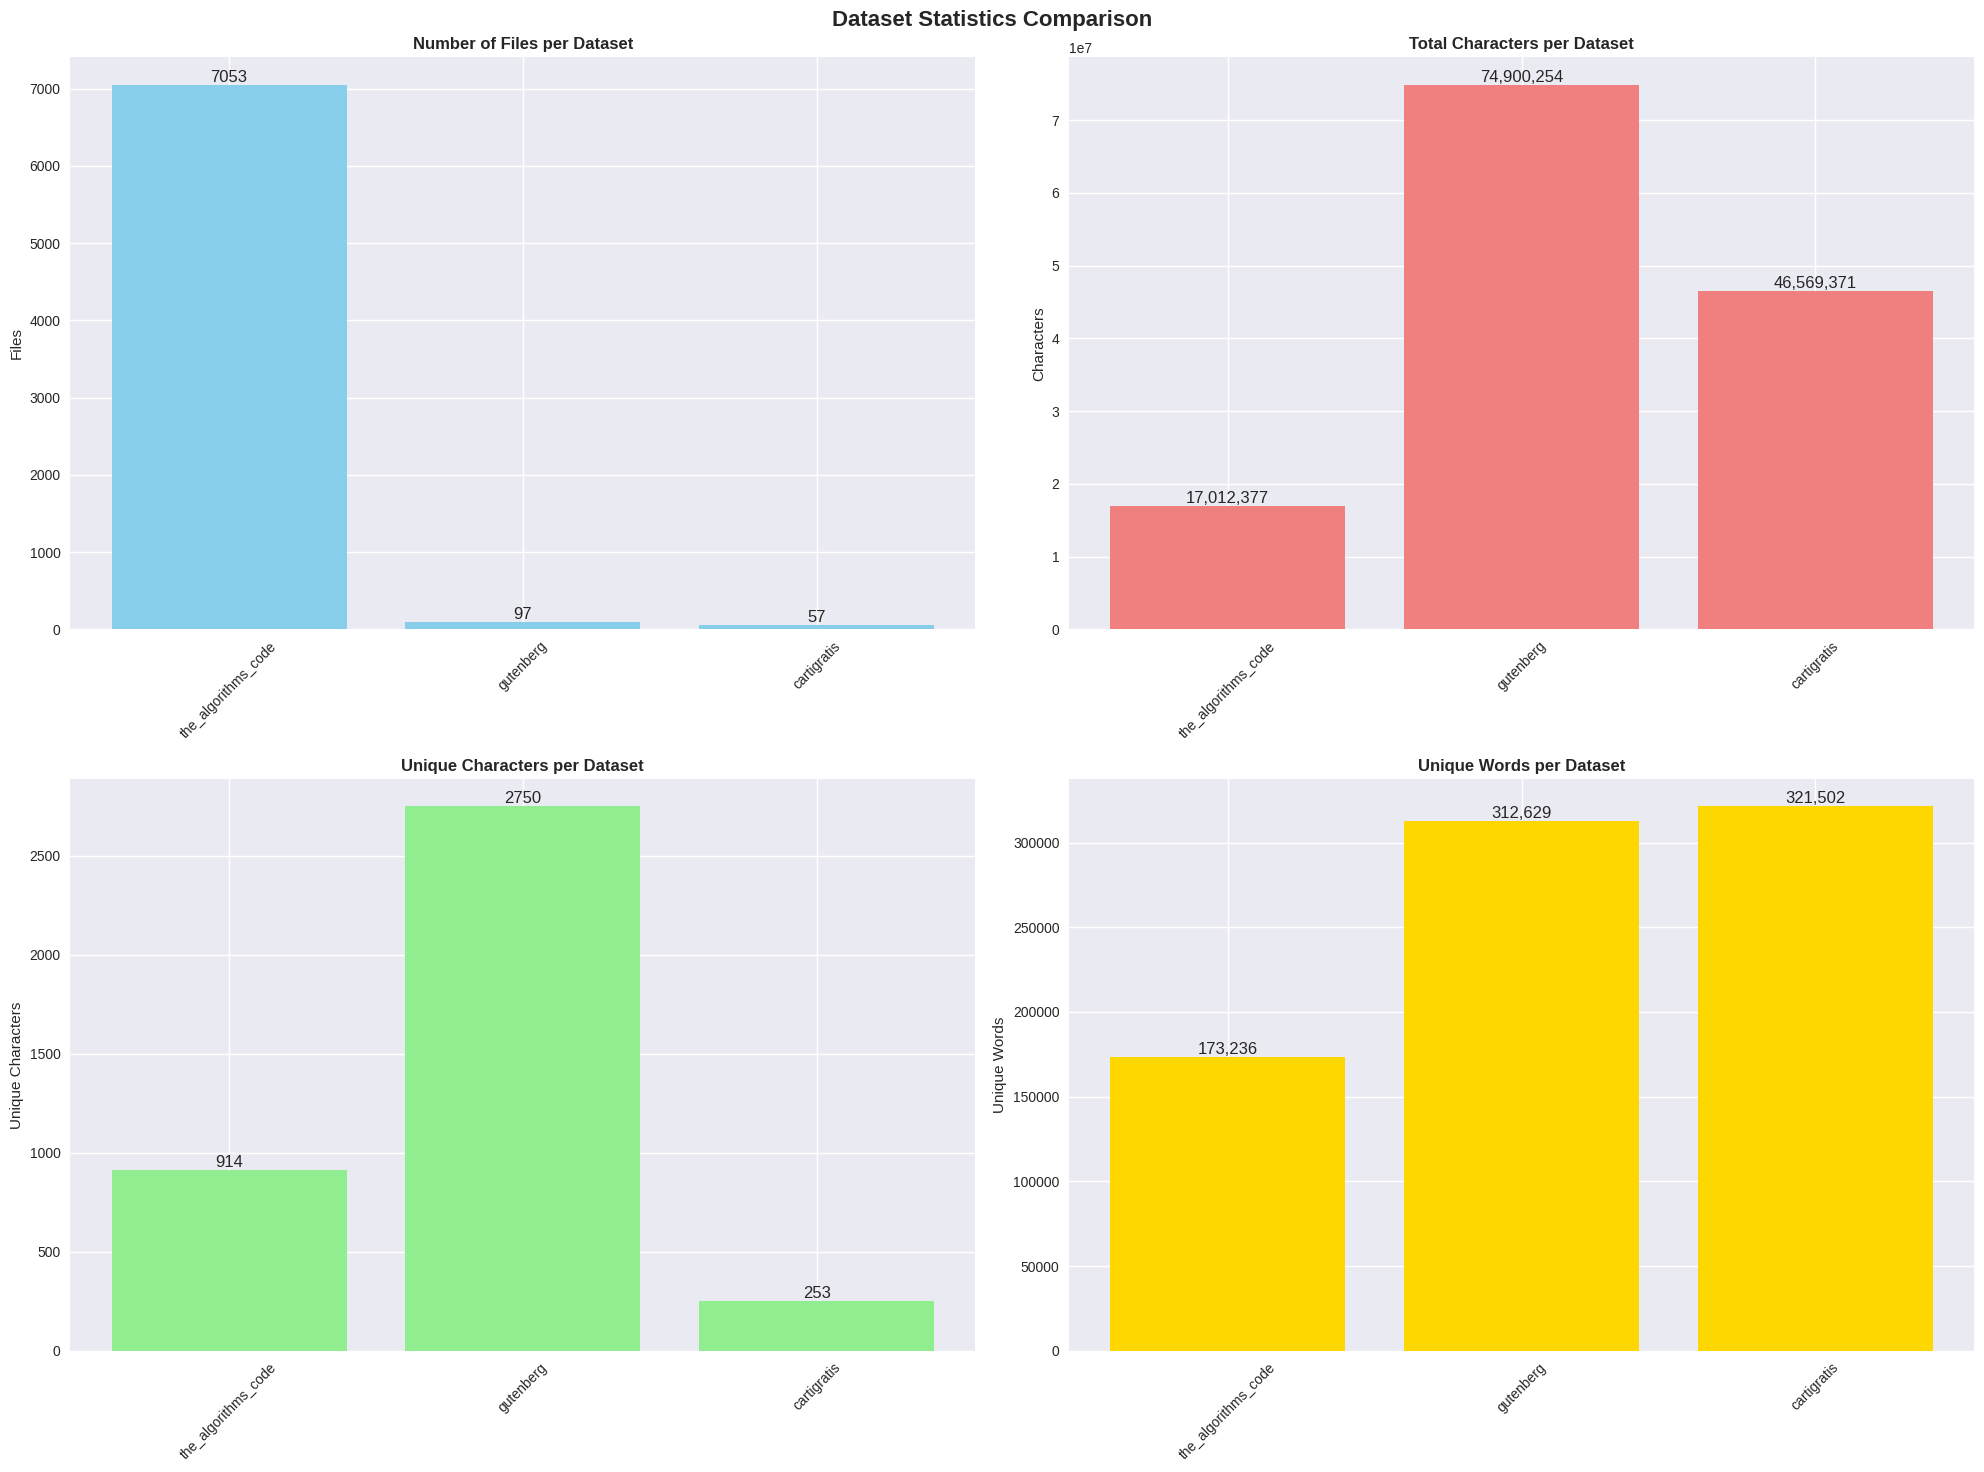



⌨️ SHIFT PRESSES ANALYSIS


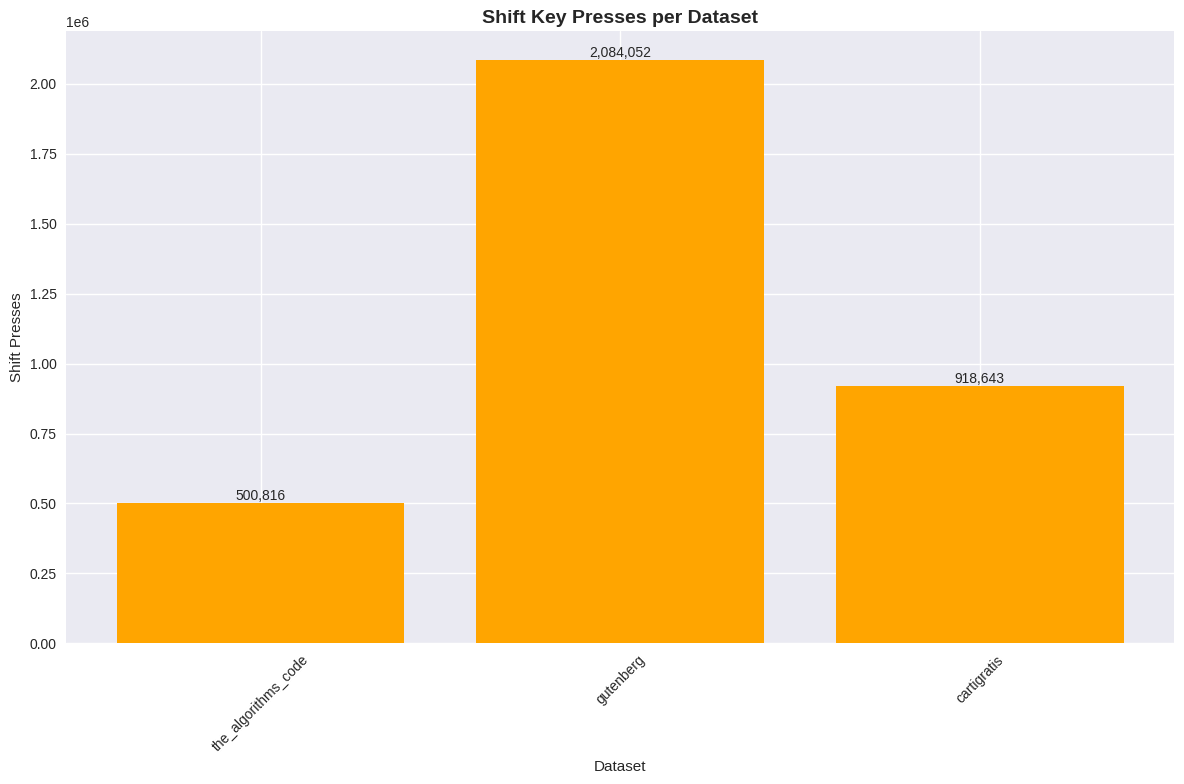



🌡️ CHARACTER DISTRIBUTION HEATMAP


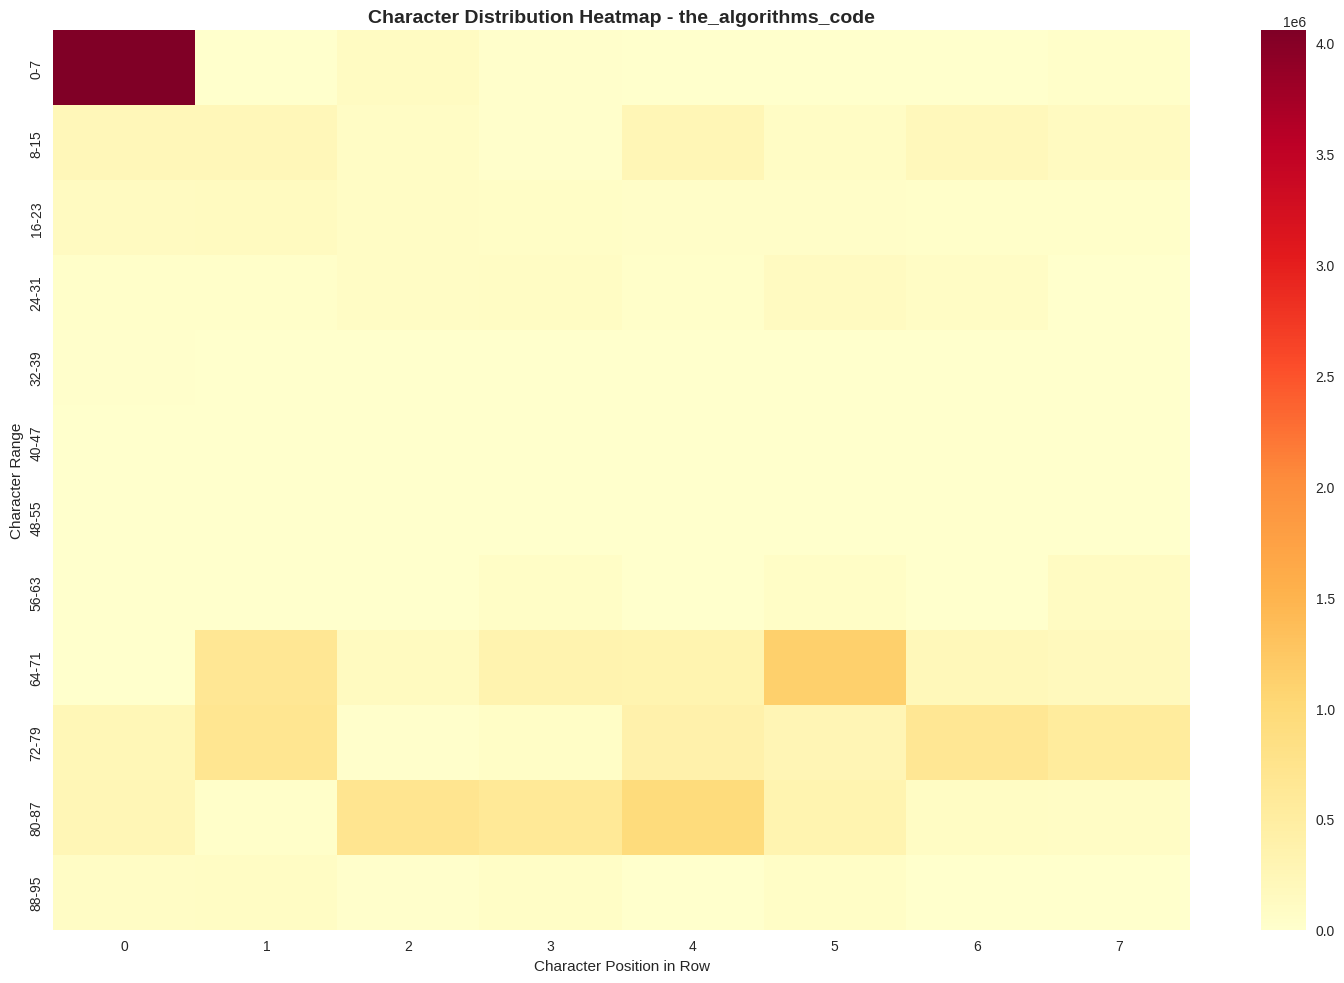



📈 CUMULATIVE FREQUENCY ANALYSIS


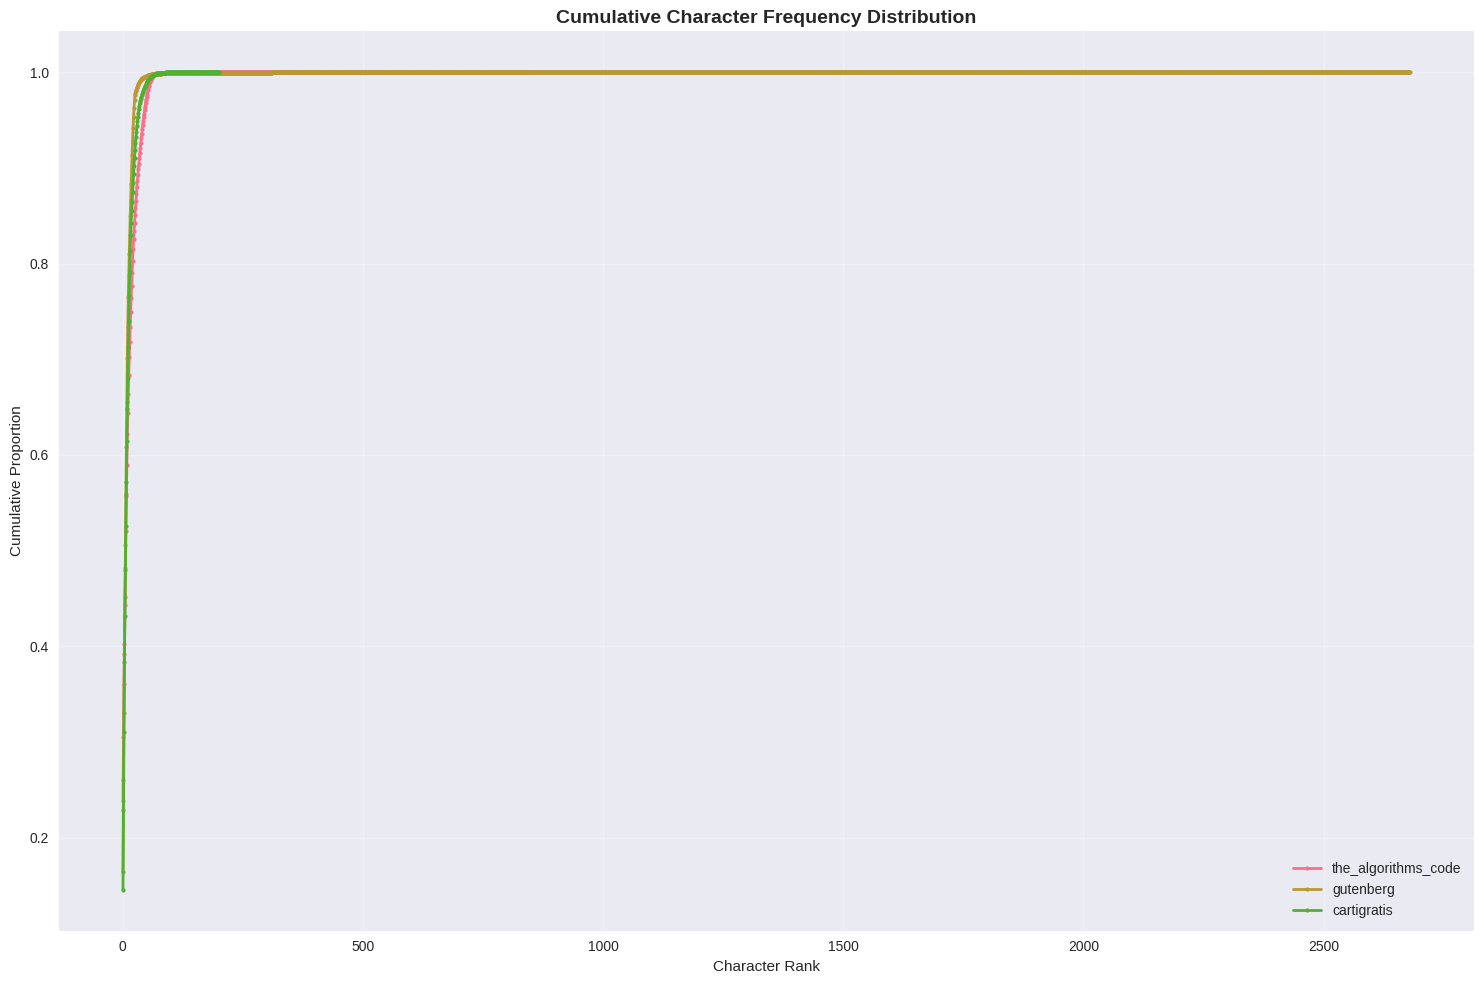



📏 WORD LENGTH DISTRIBUTION


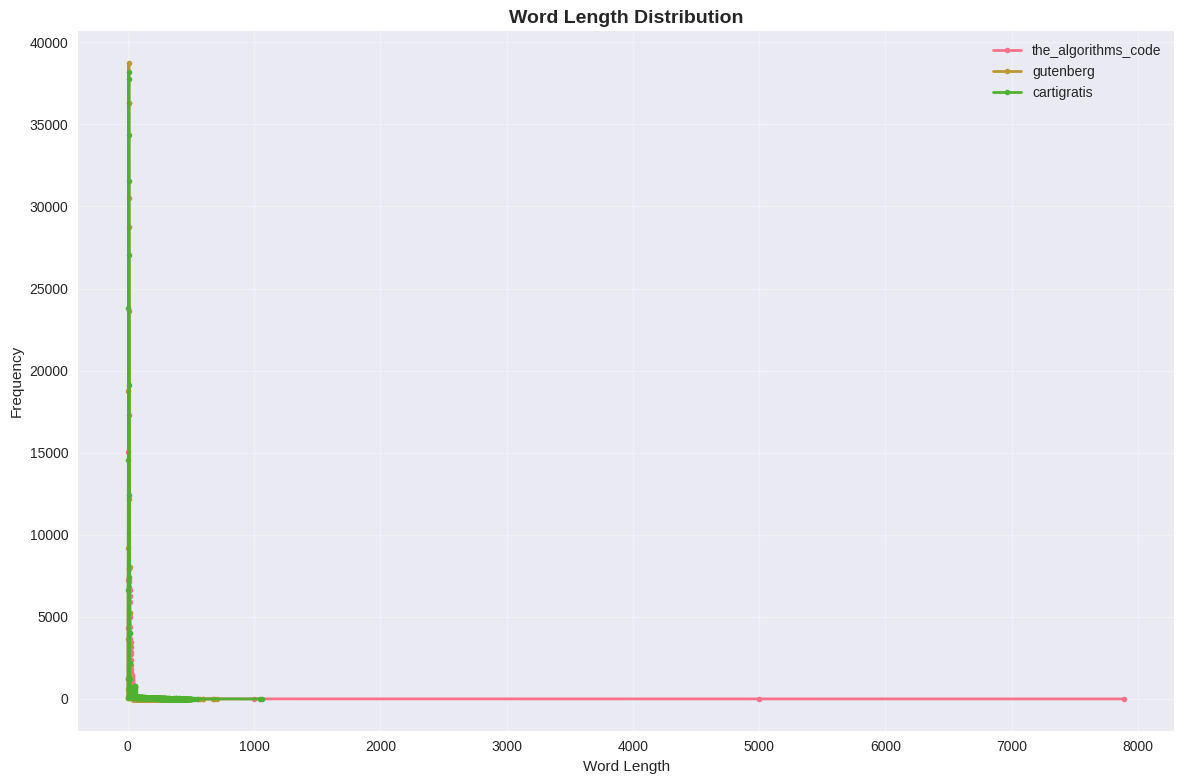


✅ Character and word frequency analysis complete!
✅ All visualizations displayed successfully!


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from collections import Counter
import string
import pickle
import os

# Set up the plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 12

print("\n" + "="*60)
print("CHARACTER & WORD FREQUENCY ANALYSIS")
print("="*60)

# Load the data first
try:
    data_file = './processed/dataset_stats_staged.pkl'
    if not os.path.exists(data_file):
        print(f"ERROR: Data file not found: {data_file}")
        print("Please run the processing script first to generate the data file.")
        data = {}
    else:
        with open(data_file, 'rb') as f:
            data = pickle.load(f)
        print(f"✅ Successfully loaded data from {data_file}")
except Exception as e:
    print(f"ERROR loading data: {e}")
    data = {}

# First, let's inspect the data structure
print(f"Data keys: {list(data.keys())}")
if data:
    first_dataset_key = list(data.keys())[0]
    print(f"First dataset structure: {list(data[first_dataset_key].keys())}")
    if 'stage1' in data[first_dataset_key]:
        print(f"Stage1 keys: {list(data[first_dataset_key]['stage1'].keys())}")
    if 'stage2' in data[first_dataset_key]:
        print(f"Stage2 keys: {list(data[first_dataset_key]['stage2'].keys())}")

if not data:  # Fixed the incomplete condition
    print("No data to analyze!")
else:
    dataset_names = list(data.keys())

    # Function to format special characters for display
    def format_char(char):
        if char == ' ':
            return 'SPACE'
        elif char == '\n':
            return 'NEWLINE'
        elif char == '\t':
            return 'TAB'
        elif char == '\r':
            return 'RETURN'
        elif ord(char) < 32:
            # Show control characters by name or hex code
            return f'U+{ord(char):04X}'
        else:
            # Show the actual character for printable Unicode
            return char

    # Function to safely get data - handles both old and new structures
    def get_char_counts(dataset_data):
        if 'stage2' in dataset_data:
            return dataset_data['stage2']['char_counts']
        elif 'char_counts' in dataset_data:
            return dataset_data['char_counts']
        else:
            raise KeyError("No char_counts found in dataset")

    def get_word_counts(dataset_data):
        if 'stage2' in dataset_data:
            return dataset_data['stage2']['word_counts']
        elif 'word_counts' in dataset_data:
            return dataset_data['word_counts']
        else:
            raise KeyError("No word_counts found in dataset")

    def get_stats(dataset_data):
        if 'stage2' in dataset_data:
            return dataset_data['stage2']['stats']
        elif 'stats' in dataset_data:
            return dataset_data['stats']
        else:
            raise KeyError("No stats found in dataset")

    def get_shift_presses(dataset_data):
        if 'stage2' in dataset_data:
            return dataset_data['stage2']['shift_presses']
        elif 'shift_presses' in dataset_data:
            return dataset_data['shift_presses']
        else:
            return 0  # Default to 0 if not found

    # 1. Top 30 Characters per Dataset
    print("\n🔤 TOP 30 CHARACTERS PER DATASET")
    print("="*80)

    char_dfs = []
    for name in dataset_names:
        try:
            char_counts = get_char_counts(data[name])
            top_chars = Counter(char_counts).most_common(30)
            df = pd.DataFrame(top_chars, columns=['Character', 'Count'])
            df['Character'] = df['Character'].apply(format_char)
            df.columns = [f"{name} Char", f"{name} Count"]
            char_dfs.append(df)
        except Exception as e:
            print(f"Error processing {name}: {e}")
            continue

    # Combine into side-by-side comparison
    if char_dfs:
        char_comparison = pd.concat(char_dfs, axis=1)
        print(char_comparison.to_string(index=False))
    else:
        print("No character data to display")

    # 2. Top 30 Words per Dataset
    print("\n\n📝 TOP 30 WORDS PER DATASET")
    print("="*80)

    word_dfs = []
    for name in dataset_names:
        try:
            word_counts = get_word_counts(data[name])
            top_words = Counter(word_counts).most_common(30)
            df = pd.DataFrame(top_words, columns=['Word', 'Count'])
            df.columns = [f"{name} Word", f"{name} Count"]
            word_dfs.append(df)
        except Exception as e:
            print(f"Error processing {name}: {e}")
            continue

    # Combine into side-by-side comparison
    if word_dfs:
        word_comparison = pd.concat(word_dfs, axis=1)
        print(word_comparison.to_string(index=False))
    else:
        print("No word data to display")

    # 3. Dataset Statistics Summary
    print("\n\n📊 DATASET STATISTICS SUMMARY")
    print("="*80)
    
    stats_data = []
    for name in dataset_names:
        try:
            stats = get_stats(data[name])
            shift_presses = get_shift_presses(data[name])
            stats_data.append({
                'Dataset': name,
                'Files': stats.get('file_count', 0),
                'Characters': stats.get('total_characters', 0),
                'Unique Chars': stats.get('unique_characters', 0),
                'Unique Words': stats.get('unique_words', 0),
                'Shift Presses': shift_presses
            })
        except Exception as e:
            print(f"Error processing stats for {name}: {e}")
            continue
    
    if stats_data:
        stats_df = pd.DataFrame(stats_data)
        print(stats_df.to_string(index=False))
    else:
        print("No statistics data to display")

    # 4. Character Frequency Visualization
    print("\n\n📈 CHARACTER FREQUENCY VISUALIZATION")
    print("="*80)
    
    valid_datasets = []
    for name in dataset_names:
        try:
            get_char_counts(data[name])
            valid_datasets.append(name)
        except:
            continue
    
    if valid_datasets:
        # Create subplots based on number of datasets (max 4)
        num_datasets = min(len(valid_datasets), 4)
        if num_datasets == 1:
            fig, ax = plt.subplots(1, 1, figsize=(12, 8))
            axes = [ax]
        elif num_datasets == 2:
            fig, axes = plt.subplots(1, 2, figsize=(20, 8))
        elif num_datasets == 3:
            fig, axes = plt.subplots(2, 2, figsize=(20, 15))
            axes = axes.flatten()
        else:
            fig, axes = plt.subplots(2, 2, figsize=(20, 15))
            axes = axes.flatten()
        
        fig.suptitle('Character Frequency Analysis', fontsize=16, fontweight='bold')
        
        for i, name in enumerate(valid_datasets[:4]):
            ax = axes[i] if num_datasets > 1 else axes[0]
            
            char_counts = get_char_counts(data[name])
            top_chars = Counter(char_counts).most_common(20)
            chars, counts = zip(*top_chars)
            chars_formatted = [format_char(c) for c in chars]
            
            bars = ax.bar(range(len(chars_formatted)), counts, color=plt.cm.Set3(np.linspace(0, 1, len(chars_formatted))))
            ax.set_title(f'{name} - Top 20 Characters', fontweight='bold')
            ax.set_xlabel('Characters')
            ax.set_ylabel('Frequency')
            ax.set_xticks(range(len(chars_formatted)))
            ax.set_xticklabels(chars_formatted, rotation=45, ha='right')
            
            # Add value labels on bars
            for bar, count in zip(bars, counts):
                ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(counts)*0.01,
                       str(count), ha='center', va='bottom', fontsize=8)
        
        # Hide unused subplots
        if num_datasets > 1:
            for i in range(num_datasets, len(axes)):
                if i < len(axes):
                    axes[i].set_visible(False)
        
        plt.tight_layout()
        plt.show()
    else:
        print("No valid datasets for character visualization")

    # 5. Word Frequency Visualization
    print("\n\n📈 WORD FREQUENCY VISUALIZATION")
    print("="*80)
    
    if valid_datasets:
        # Create subplots based on number of datasets (max 4)
        num_datasets = min(len(valid_datasets), 4)
        if num_datasets == 1:
            fig, ax = plt.subplots(1, 1, figsize=(12, 8))
            axes = [ax]
        elif num_datasets == 2:
            fig, axes = plt.subplots(1, 2, figsize=(20, 8))
        elif num_datasets == 3:
            fig, axes = plt.subplots(2, 2, figsize=(20, 15))
            axes = axes.flatten()
        else:
            fig, axes = plt.subplots(2, 2, figsize=(20, 15))
            axes = axes.flatten()
        
        fig.suptitle('Word Frequency Analysis', fontsize=16, fontweight='bold')
        
        for i, name in enumerate(valid_datasets[:4]):
            ax = axes[i] if num_datasets > 1 else axes[0]
            
            word_counts = get_word_counts(data[name])
            top_words = Counter(word_counts).most_common(20)
            words, counts = zip(*top_words)
            
            bars = ax.bar(range(len(words)), counts, color=plt.cm.Set1(np.linspace(0, 1, len(words))))
            ax.set_title(f'{name} - Top 20 Words', fontweight='bold')
            ax.set_xlabel('Words')
            ax.set_ylabel('Frequency')
            ax.set_xticks(range(len(words)))
            ax.set_xticklabels(words, rotation=45, ha='right')
            
            # Add value labels on bars
            for bar, count in zip(bars, counts):
                ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(counts)*0.01,
                       str(count), ha='center', va='bottom', fontsize=8)
        
        # Hide unused subplots
        if num_datasets > 1:
            for i in range(num_datasets, len(axes)):
                if i < len(axes):
                    axes[i].set_visible(False)
        
        plt.tight_layout()
        plt.show()
    else:
        print("No valid datasets for word visualization")

    # 6. Dataset Comparison Charts
    print("\n\n📊 DATASET COMPARISON CHARTS")
    print("="*80)
    
    if stats_data:
        stats_df = pd.DataFrame(stats_data)
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 15))
        fig.suptitle('Dataset Statistics Comparison', fontsize=16, fontweight='bold')
        
        # Files per dataset
        bars1 = ax1.bar(stats_df['Dataset'], stats_df['Files'], color='skyblue')
        ax1.set_title('Number of Files per Dataset', fontweight='bold')
        ax1.set_ylabel('Files')
        ax1.tick_params(axis='x', rotation=45)
        for bar in bars1:
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}', ha='center', va='bottom')
        
        # Characters per dataset
        bars2 = ax2.bar(stats_df['Dataset'], stats_df['Characters'], color='lightcoral')
        ax2.set_title('Total Characters per Dataset', fontweight='bold')
        ax2.set_ylabel('Characters')
        ax2.tick_params(axis='x', rotation=45)
        for bar in bars2:
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height):,}', ha='center', va='bottom')
        
        # Unique characters per dataset
        bars3 = ax3.bar(stats_df['Dataset'], stats_df['Unique Chars'], color='lightgreen')
        ax3.set_title('Unique Characters per Dataset', fontweight='bold')
        ax3.set_ylabel('Unique Characters')
        ax3.tick_params(axis='x', rotation=45)
        for bar in bars3:
            height = bar.get_height()
            ax3.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}', ha='center', va='bottom')
        
        # Unique words per dataset
        bars4 = ax4.bar(stats_df['Dataset'], stats_df['Unique Words'], color='gold')
        ax4.set_title('Unique Words per Dataset', fontweight='bold')
        ax4.set_ylabel('Unique Words')
        ax4.tick_params(axis='x', rotation=45)
        for bar in bars4:
            height = bar.get_height()
            ax4.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height):,}', ha='center', va='bottom')
        
        plt.tight_layout()
        plt.show()
    else:
        print("No statistics data for comparison charts")

    # 7. Shift Presses Analysis
    print("\n\n⌨️ SHIFT PRESSES ANALYSIS")
    print("="*80)
    
    if stats_data:
        stats_df = pd.DataFrame(stats_data)
        fig, ax = plt.subplots(figsize=(12, 8))
        bars = ax.bar(stats_df['Dataset'], stats_df['Shift Presses'], color='orange')
        ax.set_title('Shift Key Presses per Dataset', fontweight='bold', fontsize=14)
        ax.set_ylabel('Shift Presses')
        ax.set_xlabel('Dataset')
        ax.tick_params(axis='x', rotation=45)
        
        # Add value labels on bars
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{int(height):,}', ha='center', va='bottom', fontsize=10)
        
        plt.tight_layout()
        plt.show()
    else:
        print("No shift press data to display")

    # 8. Character Distribution Heatmap (for first valid dataset)
    if valid_datasets:
        print("\n\n🌡️ CHARACTER DISTRIBUTION HEATMAP")
        print("="*80)
        
        first_dataset = valid_datasets[0]
        char_counts = get_char_counts(data[first_dataset])
        
        # Get printable ASCII characters
        ascii_chars = [chr(i) for i in range(32, 127)]
        ascii_counts = [char_counts.get(c, 0) for c in ascii_chars]
        
        # Reshape for heatmap (proper calculation)
        ascii_array = np.array(ascii_counts)
        rows = 12
        cols = 8
        # Pad with zeros if needed to make it fit exactly 12x8
        padded_size = rows * cols
        if len(ascii_array) < padded_size:
            ascii_array = np.pad(ascii_array, (0, padded_size - len(ascii_array)), constant_values=0)
        heatmap_data = ascii_array[:padded_size].reshape(rows, cols)
        
        plt.figure(figsize=(15, 10))
        sns.heatmap(heatmap_data, 
                   xticklabels=range(8), 
                   yticklabels=[f'{i*8}-{(i+1)*8-1}' for i in range(12)],
                   cmap='YlOrRd', 
                   annot=False, 
                   cbar=True)
        plt.title(f'Character Distribution Heatmap - {first_dataset}', fontweight='bold', fontsize=14)
        plt.xlabel('Character Position in Row')
        plt.ylabel('Character Range')
        plt.tight_layout()
        plt.show()
    else:
        print("No valid datasets for heatmap")

    # 9. Cumulative Frequency Analysis
    print("\n\n📈 CUMULATIVE FREQUENCY ANALYSIS")
    print("="*80)
    
    if valid_datasets:
        fig, ax = plt.subplots(figsize=(15, 10))
        
        for name in valid_datasets:
            char_counts = get_char_counts(data[name])
            sorted_counts = sorted(char_counts.values(), reverse=True)
            cumulative = np.cumsum(sorted_counts)
            normalized_cumulative = cumulative / cumulative[-1] if cumulative[-1] > 0 else cumulative
            
            ax.plot(range(1, len(normalized_cumulative) + 1), normalized_cumulative, 
                   marker='o', markersize=3, linewidth=2, label=name)
        
        ax.set_title('Cumulative Character Frequency Distribution', fontweight='bold', fontsize=14)
        ax.set_xlabel('Character Rank')
        ax.set_ylabel('Cumulative Proportion')
        ax.legend()
        ax.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        print("No valid datasets for cumulative analysis")

    # 10. Word Length Distribution
    print("\n\n📏 WORD LENGTH DISTRIBUTION")
    print("="*80)
    
    if valid_datasets:
        fig, ax = plt.subplots(figsize=(12, 8))
        
        for name in valid_datasets:
            word_counts = get_word_counts(data[name])
            word_lengths = [len(word) for word in word_counts.keys()]
            length_counter = Counter(word_lengths)
            
            lengths = sorted(length_counter.keys())
            frequencies = [length_counter[l] for l in lengths]
            
            ax.plot(lengths, frequencies, marker='o', linewidth=2, label=name, markersize=4)
        
        ax.set_title('Word Length Distribution', fontweight='bold', fontsize=14)
        ax.set_xlabel('Word Length')
        ax.set_ylabel('Frequency')
        ax.legend()
        ax.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        print("No valid datasets for word length distribution")

    print("\n✅ Character and word frequency analysis complete!")
    print("✅ All visualizations displayed successfully!")